In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
av=pd.read_csv('Avocado.csv')
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
av.shape

(16468, 14)

In [4]:
av=av.drop(['Unnamed: 0'],axis=1)

In [5]:
av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [7]:
av.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [8]:
av.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
av.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [10]:
av['Total Volume']=av['Total Volume'].replace(np.nan,av['Total Volume'].mean())
av['AveragePrice']=av['AveragePrice'].replace(np.nan,av['AveragePrice'].mean())
av['Total Bags']=av['Total Bags'].replace(np.nan,av['Total Bags'].mean())
av['Small Bags']=av['Small Bags'].replace(np.nan,av['Small Bags'].mean())
av['Large Bags']=av['Large Bags'].replace(np.nan,av['Large Bags'].mean())
av['XLarge Bags']=av['XLarge Bags'].replace(np.nan,av['XLarge Bags'].mean())
av['year']=av['year'].replace(np.nan,av['year'].mean())

In [11]:
av['4046']=av['4046'].replace(np.nan,av['4046'].mean())
av['4225']=av['4225'].replace(np.nan,av['4225'].mean())
av['4770']=av['4770'].replace(np.nan,av['4770'].mean())

In [12]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
av['type']=imp.fit_transform(av['type'].values.reshape(-1,1))
av['region']=imp.fit_transform(av['region'].values.reshape(-1,1))
av['Date']=imp.fit_transform(av['Date'].values.reshape(-1,1))

In [13]:
av.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

conventional    16468
Name: type, dtype: int64


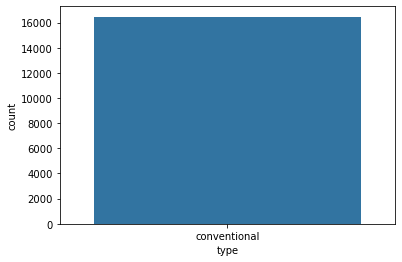

In [14]:
sns.countplot(x='type',data=av)
print(av['type'].value_counts())

In [15]:
print(av['region'].value_counts())

California             15027
Albany                    67
BaltimoreWashington       65
Boise                     65
Boston                    62
Atlanta                   54
PhoenixTucson             52
BuffaloRochester          51
Spokane                   49
Columbus                  47
NewYork                   44
Jacksonville              41
Detroit                   40
SouthCentral              39
SanDiego                  38
West                      36
Tampa                     34
Louisville                34
Charlotte                 31
Portland                  30
Houston                   29
NorthernNewEngland        29
WestTexNewMexico          27
TotalUS                   25
Nashville                 25
Denver                    24
SouthCarolina             24
GrandRapids               23
Chicago                   23
Pittsburgh                22
RichmondNorfolk           21
Orlando                   21
Syracuse                  19
HarrisburgScranton        19
Midsouth      

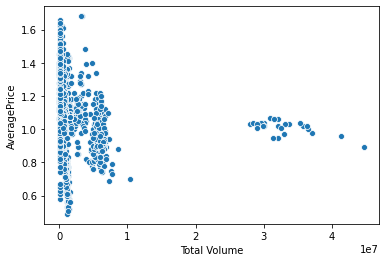

In [16]:
sns.scatterplot(x='Total Volume',y='AveragePrice',data=av)

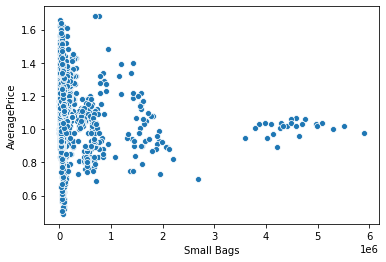

In [17]:
sns.scatterplot(x='Small Bags',y='AveragePrice',data=av)

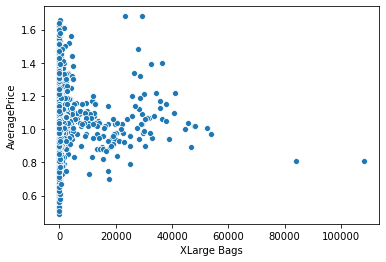

In [18]:
sns.scatterplot(x='XLarge Bags',y='AveragePrice',data=av)

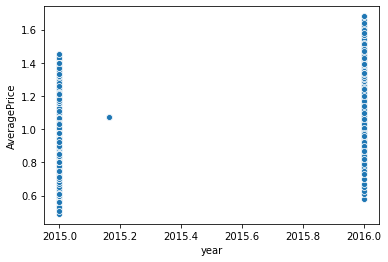

In [19]:
sns.scatterplot(x='year',y='AveragePrice',data=av)

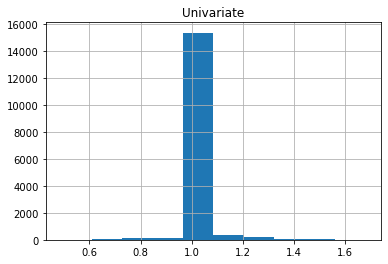

In [20]:
av['AveragePrice'].hist(grid=True)                # Univariate analysis
plt.title('Univariate')
plt.show()

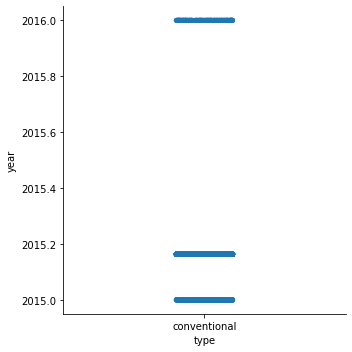

In [21]:
sns.catplot(x='type',y='year',data=av)

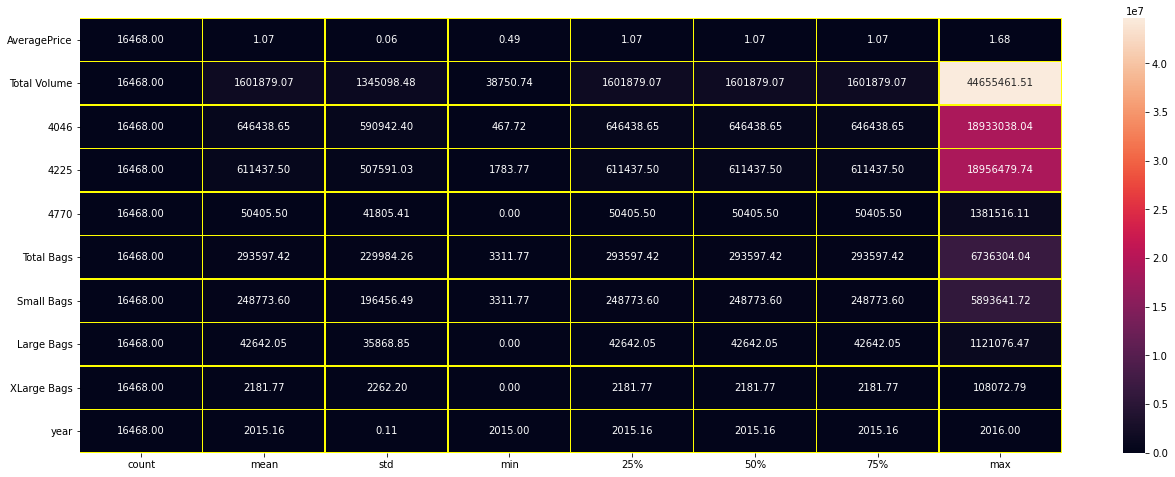

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(av.describe().T,annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

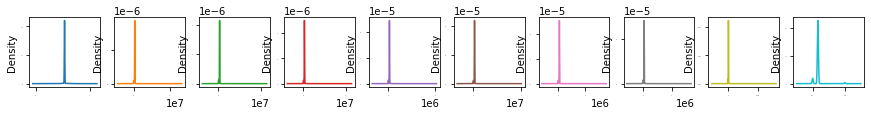

In [23]:
av.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

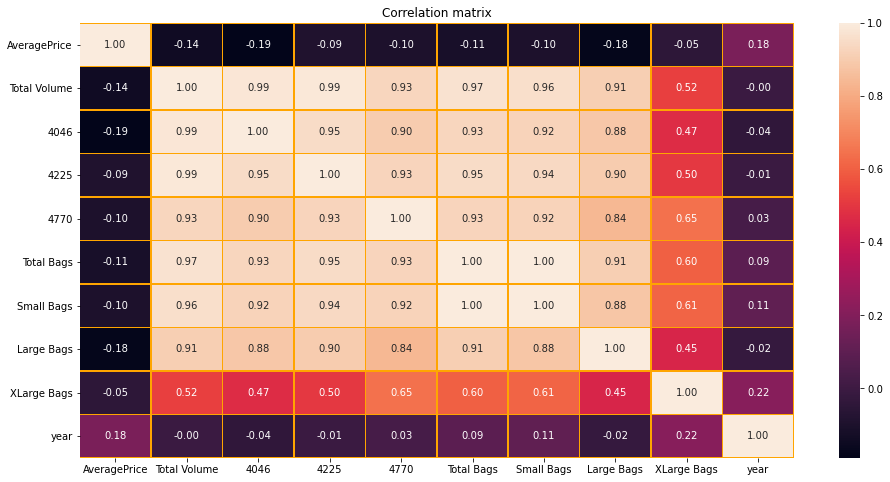

In [24]:
corr=av.corr()                                               # multivariate analysis
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

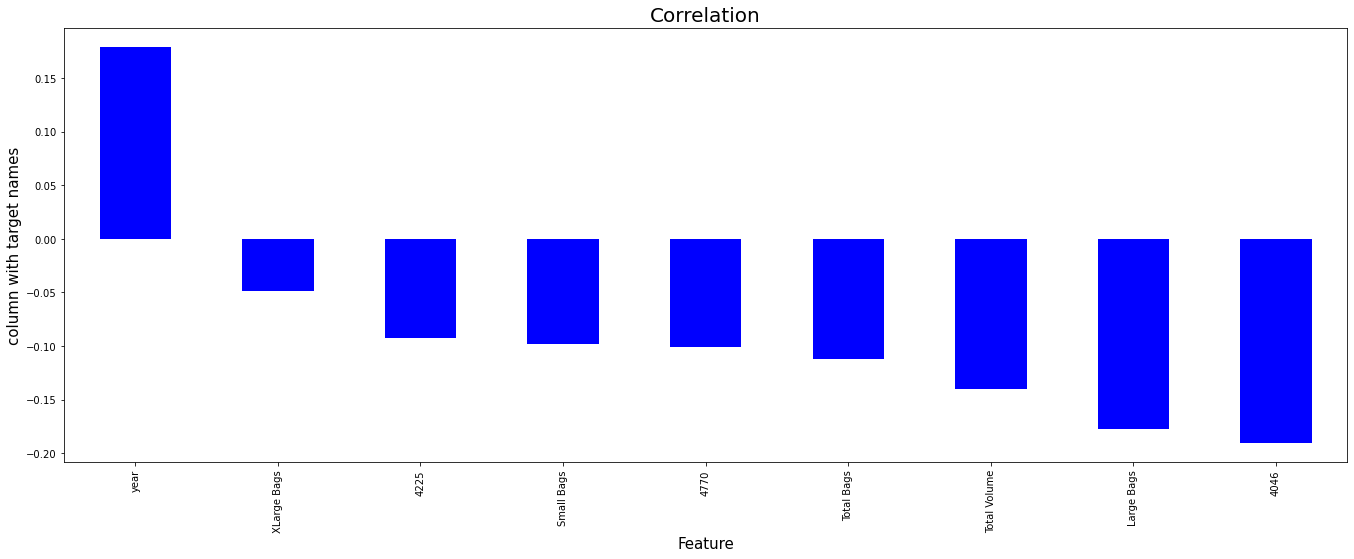

In [25]:
plt.figure(figsize=(23,8))
av.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

In [26]:
av.skew()

AveragePrice    -0.360270
Total Volume    20.409801
4046            19.921599
4225            21.051013
4770            17.792883
Total Bags      17.665207
Small Bags      17.628360
Large Bags      16.934805
XLarge Bags     19.010574
year             6.018559
dtype: float64

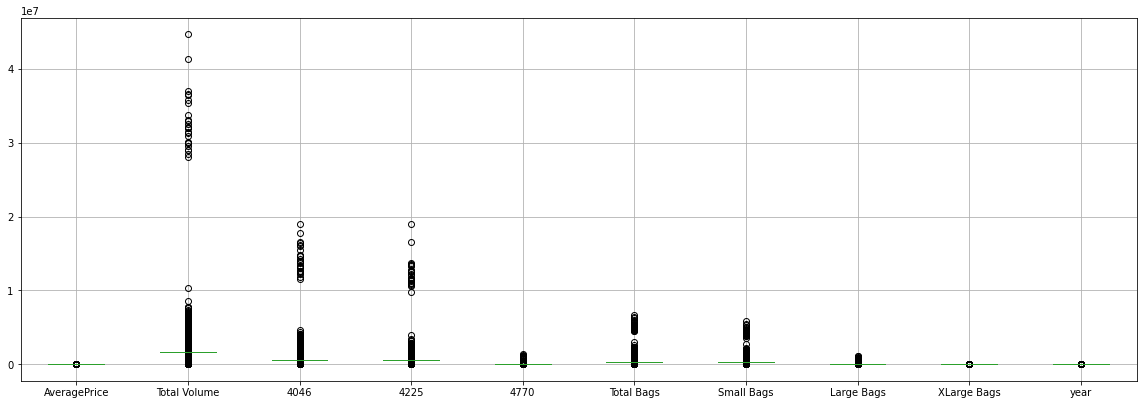

In [27]:
av.iloc[:,0:13].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [29]:
for i in av.columns:
    if av[i].dtype=="object":
        av[i]=enc.fit_transform(av[i].values.reshape(-1,1))

In [30]:
av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,92.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015.0,0.0
1,68.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015.0,0.0
2,44.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015.0,0.0
3,20.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015.0,0.0
4,98.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015.0,0.0


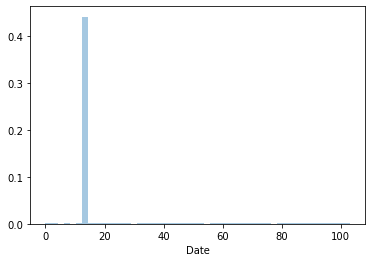

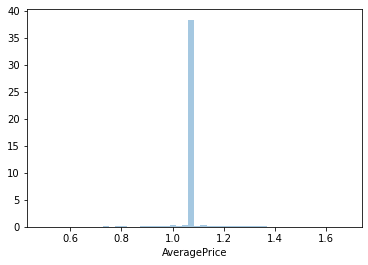

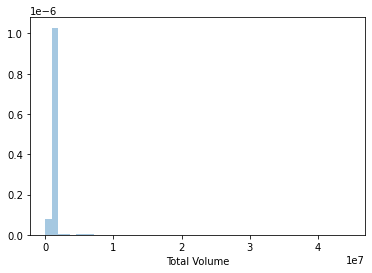

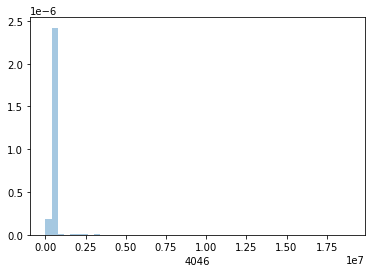

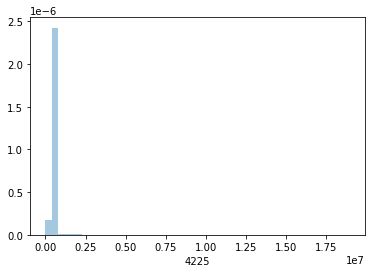

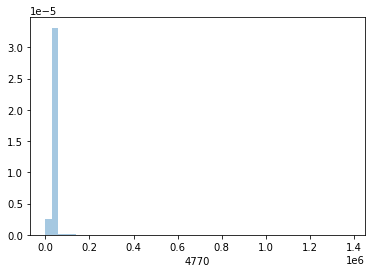

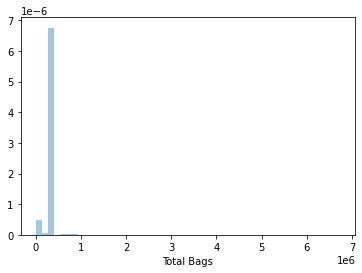

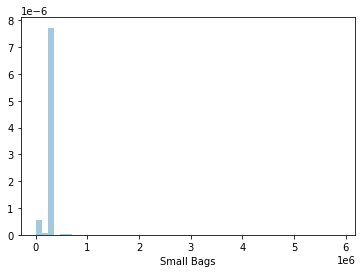

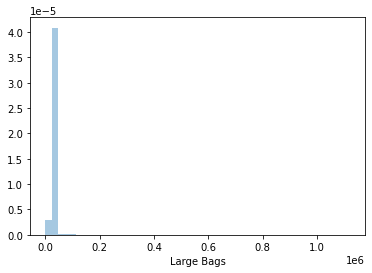

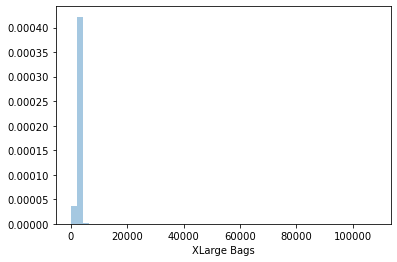

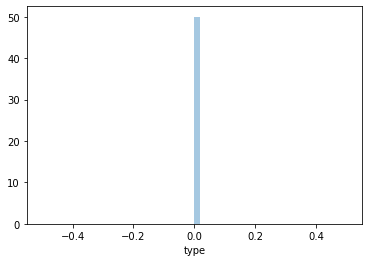

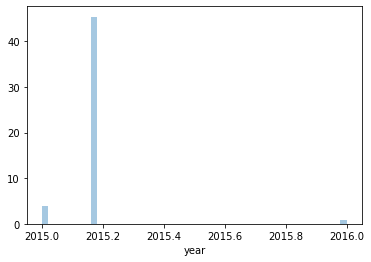

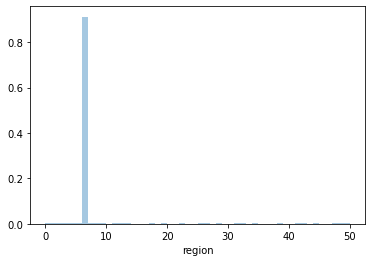

In [31]:
for j in av.columns:
    plt.figure()
    sns.distplot(av[j])

In [32]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(av))
z.shape

(16468, 13)

In [33]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    1, ..., 1515, 1516, 1516], dtype=int64), array([ 0,  1,  0, ..., 11,  1, 11], dtype=int64))


In [34]:
av_new=av[(z<3).all(axis=1)]
print(av.shape)
print(av_new.shape)

(16468, 13)
(0, 13)


In [35]:
loss=((16468)/16468)*100
loss

100.0

In [36]:
av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,92.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015.0,0.0
1,68.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015.0,0.0
2,44.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015.0,0.0
3,20.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015.0,0.0
4,98.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015.0,0.0


In [37]:
x=av.drop(['AveragePrice'],axis=1)
y=av['AveragePrice']

In [38]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [40]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    pred=ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.37187609560009594 on Random_state  1
Best Accuracy is  0.37187609560009594 on Random_state  1
Best Accuracy is  0.38747981115904295 on Random_state  3
Best Accuracy is  0.38747981115904295 on Random_state  3
Best Accuracy is  0.38747981115904295 on Random_state  3
Best Accuracy is  0.39627990903488763 on Random_state  6
Best Accuracy is  0.39627990903488763 on Random_state  6
Best Accuracy is  0.39627990903488763 on Random_state  6
Best Accuracy is  0.39627990903488763 on Random_state  6
Best Accuracy is  0.39627990903488763 on Random_state  6
Best Accuracy is  0.39627990903488763 on Random_state  6
Best Accuracy is  0.39627990903488763 on Random_state  6
Best Accuracy is  0.39627990903488763 on Random_state  6
Best Accuracy is  0.39627990903488763 on Random_state  6
Best Accuracy is  0.39627990903488763 on Random_state  6
Best Accuracy is  0.40874515179081883 on Random_state  16
Best Accuracy is  0.40874515179081883 on Random_state  16
Best Accuracy is  0.408745151

Best Accuracy is  0.4676597622476635 on Random_state  139
Best Accuracy is  0.4676597622476635 on Random_state  139
Best Accuracy is  0.4676597622476635 on Random_state  139
Best Accuracy is  0.4676597622476635 on Random_state  139
Best Accuracy is  0.4676597622476635 on Random_state  139
Best Accuracy is  0.4676597622476635 on Random_state  139
Best Accuracy is  0.4676597622476635 on Random_state  139
Best Accuracy is  0.4676597622476635 on Random_state  139


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=139)
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('predicted price',pred)
print('actual price',y_test)
print('Error :-')
print('mean absolute error :-',mean_absolute_error(y_test,pred))
print('mean squared error :-',mean_squared_error(y_test,pred))
print('root mean squared error :-',np.sqrt(mean_squared_error(y_test,pred)))
from sklearn.metrics import r2_score
print('r2_score value :-',r2_score(y_test,pred))

predicted price [1.07391178 1.14418609 1.07391178 ... 1.07391178 1.07391178 1.07391178]
actual price 10080    1.07499
656      1.16000
4034     1.07499
7315     1.07499
11127    1.07499
          ...   
12805    1.07499
4463     1.07499
8650     1.07499
8878     1.07499
8006     1.07499
Name: AveragePrice, Length: 4941, dtype: float64
Error :-
mean absolute error :- 0.010598329355409029
mean squared error :- 0.0017101814437521792
root mean squared error :- 0.0413543400836258
r2_score value :- 0.4676597622476635


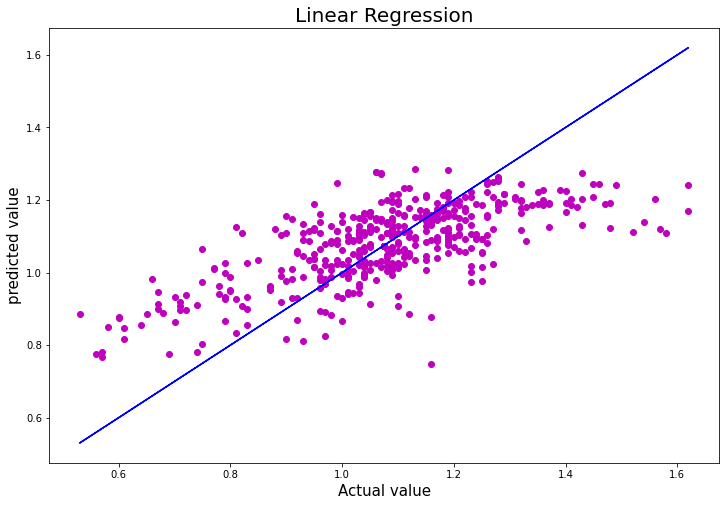

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=pred,color='m')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title("Linear Regression",fontsize=20)
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [45]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(1,20))}
en=ElasticNet()
gsp=GridSearchCV(en,parameters)
gsp.fit(x_train,y_train)
print(gsp.best_params_)

{'alpha': 0.0001, 'random_state': 1}


In [46]:
en=ElasticNet(alpha=0.0001,random_state=1)
en.fit(x_train,y_train)
preden=en.predict(x_test)
r2=r2_score(y_test,preden)
print(r2)

0.45999453339276786


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)
print(r2)

0.8236998216751477


In [48]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2=r2_score(y_test,predad)
print(r2)

0.6284276653610132


In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mae')
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2=r2_score(y_test,preddtr)
print(r2)

0.700006032648723


In [52]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ln,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model -9.697058437785973e+24


In [53]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(en,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model -1.167407105721412e+25


In [54]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(rf,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model -82991.8


In [55]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ad,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model -7.20311564799001e+26


In [56]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dtr,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.8


minimum difference is r2score and cross validation score is for DecisionTreeRegressor() so this is our best model.

In [57]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mae')
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2=r2_score(y_test,preddtr)
print(r2)

0.7250291544765495


In [58]:
import joblib
joblib.dump(dtr,'avocadomodel.obj')

['avocadomodel.obj']